# Plotting with Plotly

For the second round of interviews, REMAX is requesting that applicants create interactive plots using Plotly Express instead of hvPlot. Create two scatter plots using the provided foreclosure data.

In [30]:
import plotly.express as px
import pandas as pd
from pathlib import Path

## Plot Foreclosures

In [33]:
# Read in data
foreclosures = pd.read_csv((r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 6\2\02-Stu_Plotting_w_Plotly\Resources\allegheny_foreclosures1.csv"),
infer_datetime_format=True,
parse_dates=True,
index_col="filing_date")

foreclosures.head()

,municipality,amount,plaintiff
filing_date,,,
2009-01-02,Tarentum Boro,61821.09,Beneficial Consumer Discount Company
2009-01-02,Elizabeth Township,24531.41,National City Real Estate Services LLC
2009-01-02,N. Fayette Township,21787.83,JPMorgan Chase Bank National Association
2009-01-02,Elizabeth Township,63072.46,JPMorgan Chase Bank National Association
2009-01-02,Homestead Boro,63693.10,Deutsche Bank National Trust Company


In [53]:
# Slice data and group
df_grp = foreclosures.groupby([foreclosures.index.year, 'municipality']).count()

df_grp_new = df_grp.reset_index()

df_grp_drop = df_grp_new.drop(['plaintiff'], axis=1)

df_grp_drop.head()

,filing_date,municipality,amount
0,2009,Aleppo Township,5
1,2009,Aspinwall Boro,4
2,2009,Avalon Boro,22
3,2009,Baldwin Boro,47
4,2009,Baldwin Township,11


### Plot relationship between municipality and the number of foreclosures

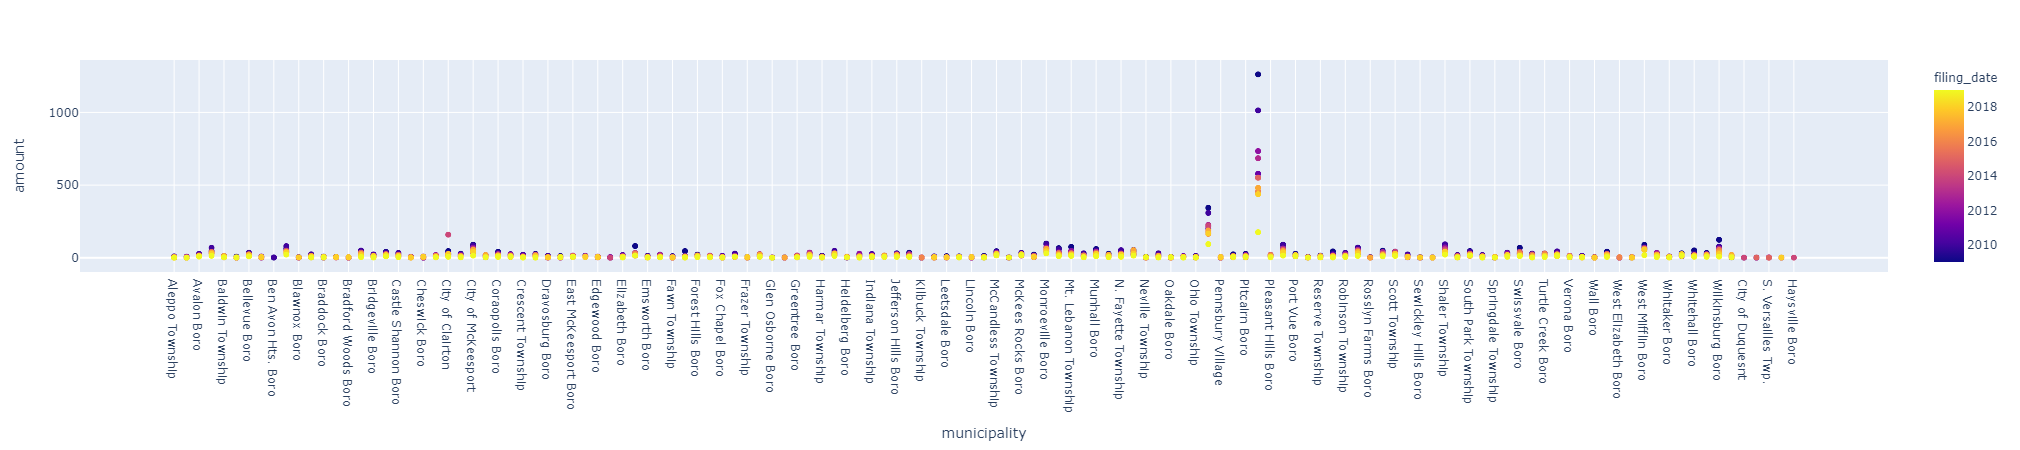

In [54]:
plot1 = px.scatter(df_grp_drop,
                   x="municipality",
                   y="amount",
                   color="filing_date")

plot1

### Plot the relationship between filing date and municipality

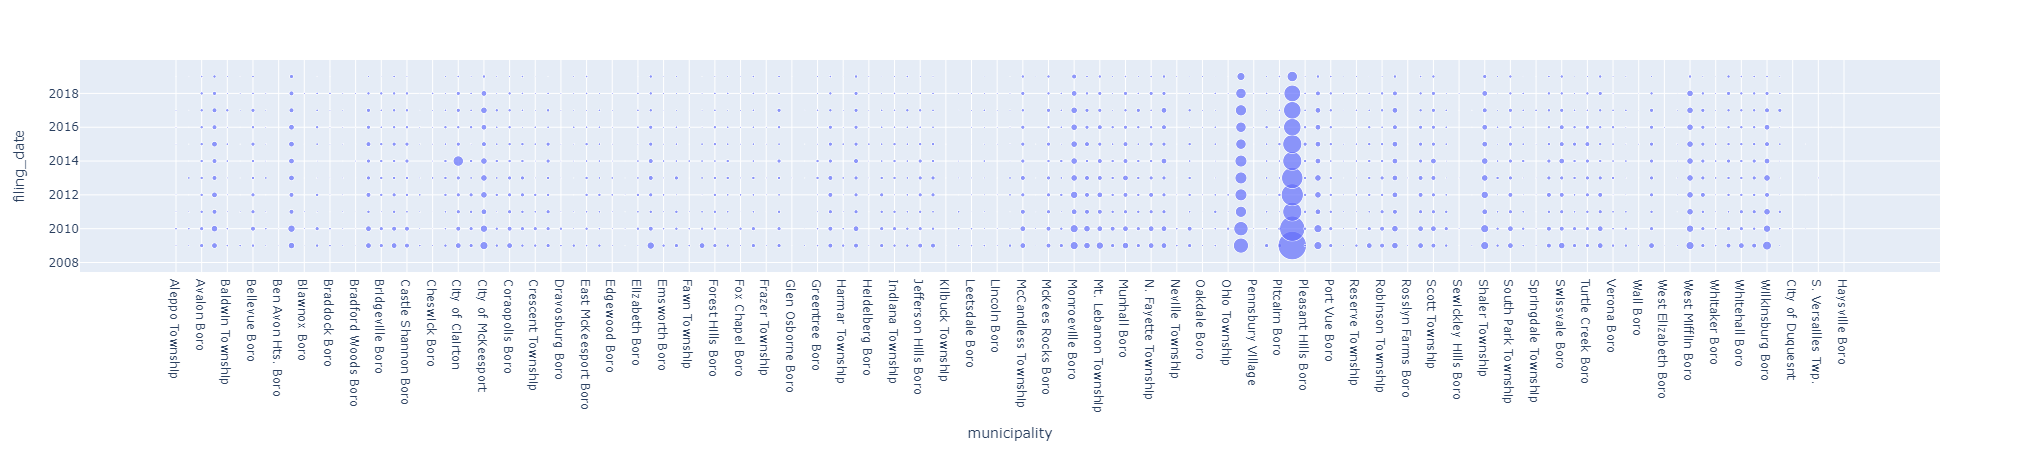

In [48]:
# Create scatter plot
plot2 = px.scatter(df_grp_drop,
                   x="municipality",
                   y="filing_date",
                   size='amount')

plot2

## Challenge

### Plot the progression of foreclosures

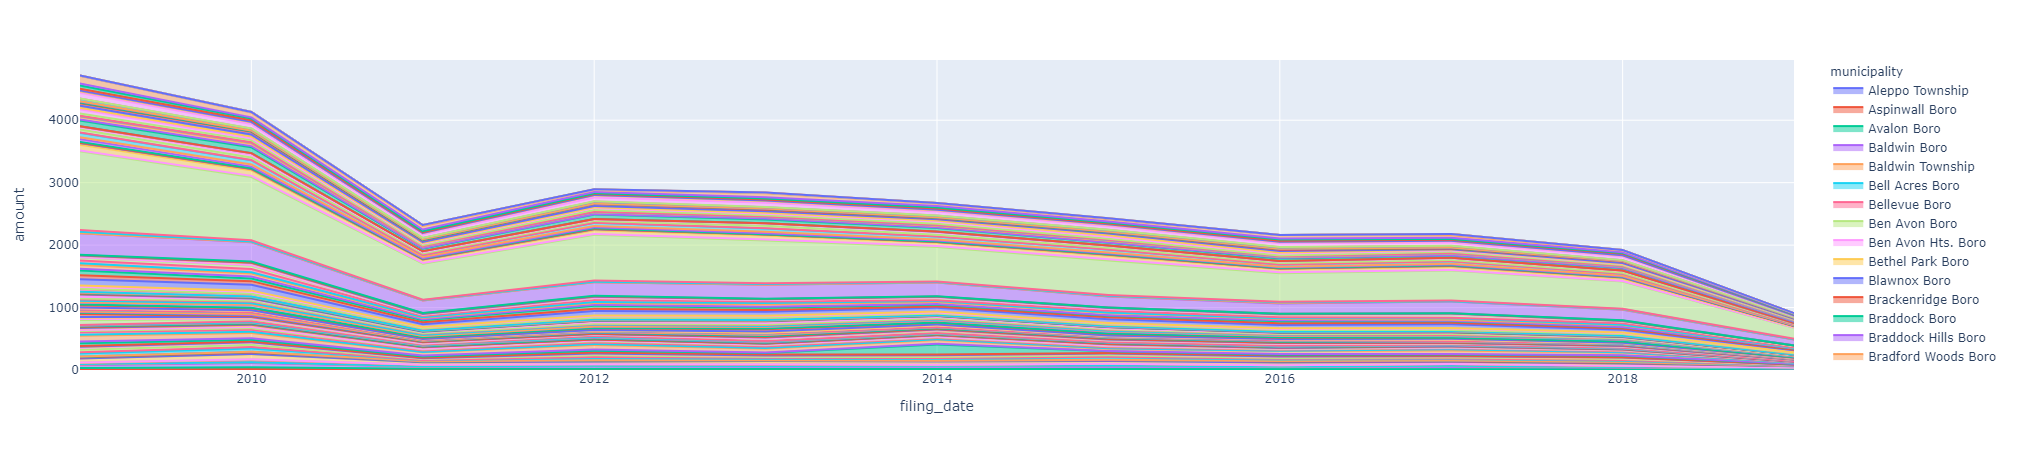

In [52]:
# Create area plot
plot3 = px.area(df_grp_new,
                x="filing_date",
                y="amount",
                line_group="municipality",
                color="municipality")

plot3